In [ ]:
## importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
 
from sklearn.ensemble import VotingClassifier
 
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
 
from google.colab import drive
 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
cd gdrive/My Drive/datasets

/content/gdrive/My Drive/datasets


In [ ]:
df = pd.read_csv('owid-covid-data.csv')

In [ ]:
df_india = df[df['location'].isin(["Turkey"])] 
df_india

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
85743,TUR,Asia,Turkey,2020-03-11,1.0,1.0,NaN,NaN,NaN,NaN,0.012,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,84339067.0,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
85744,TUR,Asia,Turkey,2020-03-12,1.0,0.0,NaN,NaN,NaN,NaN,0.012,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,84339067.0,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
85745,TUR,Asia,Turkey,2020-03-13,5.0,4.0,NaN,NaN,NaN,NaN,0.059,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,84339067.0,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
85746,TUR,Asia,Turkey,2020-03-14,5.0,0.0,NaN,NaN,NaN,NaN,0.059,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,84339067.0,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
85747,TUR,Asia,Turkey,2020-03-15,6.0,1.0,NaN,NaN,NaN,NaN,0.071,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,84339067.0,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86187,TUR,Asia,Turkey,2021-05-29,5235978.0,7656.0,8190.000,47271.0,137.0,171.429,62082.475,90.776,97.108,560.488,1.624,2.033,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222613.0,53700891.0,636.726,2.640,219072.0,2.598,0.037,26.7,tests performed,28802681.0,16498868.0,12303813.0,72504.0,140533.0,34.15,19.56,14.59,1666.0,74.07,84339067.0,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
86188,TUR,Asia,Turkey,2021-05-30,5242911.0,6933.0,8060.571,47405.0,134.0,162.429,62164.679,82.204,95.573,562.076,1.589,1.926,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218957.0,53919848.0,639.322,2.596,220310.0,2.612,0.037,27.3,tests performed,28960961.0,16551775.0,12409186.0,158280.0,130319.0,34.34,19.63,14.71,1545.0,74.07,84339067.0,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
86189,TUR,Asia,Turkey,2021-05-31,5249404.0,6493.0,7913.429,47527.0,122.0,154.429,62241.666,76.987,93.829,563.523,1.447,1.831,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219461.0,54139309.0,641.924,2.602,220711.0,2.617,0.036,27.9,tests performed,29171543.0,16628831.0,12542712.0,210582.0,144330.0,34.59,19.72,14.

In [ ]:
df_india_filtered = df_india.filter(items=[
                                           'new_cases',
                                           'new_deaths',
                                           'reproduction_rate', 'positive_rate', 'stringency_index',
                                           'new_tests',
                                           'new_vaccinations',
                                           'people_vaccinated', 'people_fully_vaccinated'])

df_india_filtered = df_india_filtered.reset_index()
df_india_filtered = df_india_filtered.drop(['index'], axis=1)

# df_india_filtered = df_india_filtered.drop(df_india_filtered.tail(2).index)
# df_india_filtered["date"] = pd.to_datetime(df_india_filtered["date"])

df_india_filtered = df_india_filtered.ffill(axis=0)
df_india_filtered = df_india_filtered.fillna(0)

In [ ]:
# full data for India filtered and selected
df_india_filtered

,new_cases,new_deaths,reproduction_rate,positive_rate,stringency_index,new_tests,new_vaccinations,people_vaccinated,people_fully_vaccinated
0,1.0,0.0,0.00,0.000,23.15,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.000,23.15,0.0,0.0,0.0,0.0
2,4.0,0.0,0.00,0.000,23.15,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.000,23.15,0.0,0.0,0.0,0.0
4,1.0,0.0,0.00,0.000,23.15,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
444,7656.0,137.0,0.76,0.037,74.07,222613.0,72504.0,16498868.0,12303813.0
445,6933.0,134.0,0.77,0.037,74.07,218957.0,158280.0,16551775.0,12409186.0
446,6493.0,122.0,0.77,0.036,74.07,219461.0,210582.0,16628831.0,12542712.0
447,7112.0,129.0,0.77,0.036,74.07,219461.0,204142.0,16740180.0,12635505.0


In [ ]:
df_india_filtered.dtypes

new_cases                  float64
new_deaths                 float64
reproduction_rate          float64
positive_rate              float64
stringency_index           float64
new_tests                  float64
new_vaccinations           float64
people_vaccinated          float64
people_fully_vaccinated    float64
dtype: object

In [ ]:
df_india_filtered.describe()

,new_cases,new_deaths,reproduction_rate,positive_rate,stringency_index,new_tests,new_vaccinations,people_vaccinated,people_fully_vaccinated
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,4.490000e+02,4.490000e+02
mean,11723.155902,106.387528,1.069532,0.061439,67.602205,121465.347439,66109.759465,2.645678e+06,1.656789e+06
std,40839.857380,90.175852,0.589493,0.053732,11.138022,79438.191177,126792.431102,4.995399e+06,3.450332e+06
min,0.000000,0.000000,0.000000,0.000000,23.150000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1412.000000,28.000000,0.790000,0.018000,63.890000,44846.000000,0.000000,0.000000e+00,0.000000e+00
50%,2861.000000,75.000000,1.020000,0.040000,69.910000,115979.000000,0.000000,0.000000e+00,0.000000e+00
75%,11520.000000,164.000000,1.140000,0.092000,75.930000,178217.000000,80148.000000,0.000000e+00,0.000000e+00
max,823225.000000,394.000000,5.210000,0.193000,87.040000,322128.000000,671693.000000,1.692437e+07,1.273268e+07


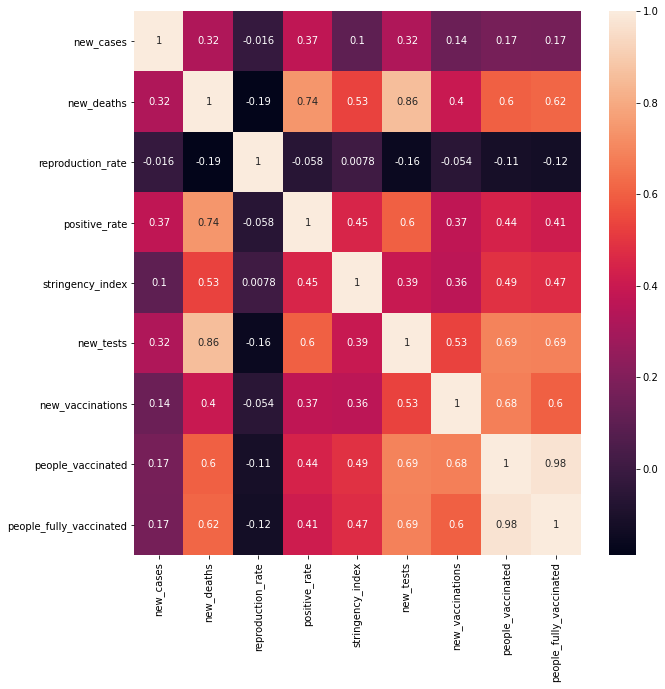

In [ ]:
plt.figure(figsize=(10,10))
df_india_filtered_corr = df_india_filtered.corr()
sns.heatmap(df_india_filtered_corr, annot=True)
plt.show()

In [ ]:
df_x = df_india_filtered.iloc[:,1:]
df_y = df_india_filtered.iloc[:,0]

In [ ]:
X_train,X_test,y_train, y_test = train_test_split( df_x,df_y,test_size=.25,random_state=42323232)

In [ ]:
# Voting Classifier -  Ensemble 


lr = LogisticRegression()
#dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [ ]:
evc = VotingClassifier( estimators= [('lr',lr),('svm',svm)], voting = 'hard')

In [ ]:
evc.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=2,
                                  gamma

In [ ]:
y_pred = evc.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
rmae = math.sqrt(mean_absolute_error(y_test, y_pred))

In [ ]:
rmse, rmae

(9969.545840038913, 69.89416778434011)